# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [93]:
import pandas as pd

df = pd.read_csv('/Users/ming/Downloads/EDA_human_temperature/data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


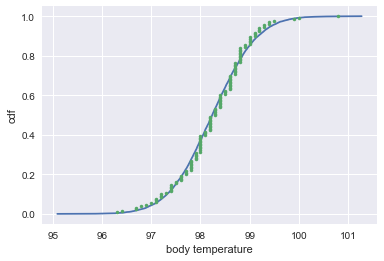

As shown in the plot, the body temperatures data is approximately normally distributed.


In [171]:
#1.Is the distribution of body temperatures normal?

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(samples)

sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('cdf')
plt.show()

print('As shown in the plot, the body temperatures data is approximately normally distributed.')

In [95]:
#2. Is the sample size large? Are the observations independent?
print('The sample size is ' + str(len(df)) + '. Based on 10% rule, since the sample size is less than 10% of the population, we can assume the observations are independent.')

The sample size is 130. Based on 10% rule, since the sample size is less than 10% of the population, we can assume the observations are independent.


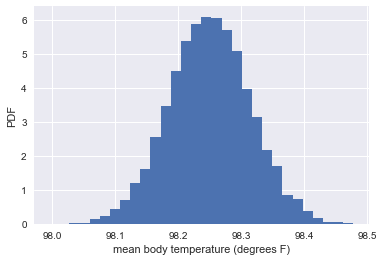

Bootstrap mean: 98.24982207692308
95% Confidence Interval: [98.12384615 98.37692308]
p-value: 0.0
z-statistic:  -5.475925202078116  p-value:  4.352315174926957e-08
t-statistic:  -5.475925202078116  p-value:  2.1887464618508545e-07
All p values are smaller than 0.05. Null hypothesis should be rejected such that the population mean is unlikely to be 98.6 degrees F.


In [150]:
#3. Is the true population mean really 98.6 degrees F?

# To try bootstrap hypothesis test with 10,000 replicates
# H0: True population mean body temperature = 98.6 degrees F
# H1: True population mean body temperature != 98.6 degrees F
# Significant _Level = 0.05

def bootstrap_replicate(data, func):
    """Generate bootstrap replicate of data."""
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate(df.temperature, np.mean)
    
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('mean body temperature (degrees F)')
_ = plt.ylabel('PDF')
plt.show()

confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
p_value = sum(bs_replicates >= 98.6) / len(bs_replicates)
print ('Bootstrap mean:', np.mean(bs_replicates))
print ('95% Confidence Interval:', confidence_interval)
print ('p-value:', p_value,)

# To try frequentist statistical testing
from scipy import stats

n = len(df.temperature)  # No. of observations
μ = 98.6 # null-hypothesis of mean 
x̄ = np.mean(df.temperature) # sample mean
s_x = np.std(df.temperature) # sample std

#z = (x̄ – μ) / σ_x̄
#z = (x̄ – μ) / (σ / √n) ; by central limit theorem
z = (x̄ - μ)/s_x * np.sqrt(n) #approximately true for n>30, all of Z's are normally distributed

pval_z= 2* (1-stats.norm.cdf(abs(z)))
print('z-statistic: ',z, ' p-value: ', pval_z)

t = (x̄ - μ)/s_x * np.sqrt(n)
pval_t = 2* (1-stats.t.cdf(abs(t), n-1)) # degree of freedom = n-1
print('t-statistic: ',t, ' p-value: ', pval_t)

print('All p values are smaller than 0.05. Null hypothesis should be rejected such that the population mean is unlikely to be 98.6 degrees F.')

Would you use a one-sample or two-sample test? Why? 
I would use one-sample test because I am not comparing parameters of two groups, but testing the mean of a single group against a known mean.

In [136]:
one_sample = stats.ttest_1samp(df.temperature, popmean=98.6)  #two-sided test for the null hypothesis that the expected mean of a sample of independent observations a is equal to the given population mean, popmean.
print('t-statistic: %f , p-value: %f' % one_sample)

t-statistic: -5.454823 , p-value: 0.000000


In this situation, is it appropriate to use the  t or  z statistic? 
In this situation, the population variance is unknown and the sample size is larger than 30. t statistic is more appropriate for dataset with unknown population variance and sample size smaller than 30.  With large sample size in this case (n = 130), it can be assumed that the sample standard deviation is approximately equal to the population standard deviation, such that z-statistic is also appropriate in addition to t statistic.

In [156]:
# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
#Which one is the correct one to use?
#What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

small_sample = np.random.choice(df.temperature, size=10)
n = len(small_sample)  # No. of observations
μ = 98.6 # null-hypothesis of mean 
x̄ = np.mean(small_sample) # sample mean
s_x = np.std(small_sample) # sample std

#z = (x̄ – μ) / σ_x̄
#z = (x̄ – μ) / (σ / √n) ; by central limit theorem
z = (x̄ - μ)/s_x * np.sqrt(n) #approximately true for n>30, all of Z's are normally distributed

pval_z= 2* (1-stats.norm.cdf(abs(z)))
print('z-statistic: ',z, ' p-value: ', pval_z)

t = (x̄ - μ)/s_x * np.sqrt(n)
pval_t = 2* (1-stats.t.cdf(abs(t), n-1)) # degree of freedom = n-1
print('t-statistic: ',t, ' p-value: ', pval_t)


z-statistic:  -1.7986923354611244  p-value:  0.07206736200904884
t-statistic:  -1.7986923354611244  p-value:  0.10560900499738168


t-statistic is the correct one to use in this case. It is because the sample size is smaller than 30, the assumption of sample variance is approximaetly equal to population variance for z-statistic is violated.

z-statistic generated a smaller p value than t-statistic. It shows that using z-statistic is more likely to reject the hypothesis than the t-statistic when the sample size is small.

In [173]:
# 5. At what temperature should we consider someone's temperature to be "abnormal"? 
# Try calculating everything using the boostrap approach, as well as the frequentist approach. 
# Start by computing the margin of error and confidence interval. 
# When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

confidence_interval = np.percentile(df.temperature, [2.5, 97.5])
std = np.std(df.temperature)
n = len(df.temperature)

#Margin of error = z-score * Standard error of the sample
margin_of_error = 1.96 *std/np.sqrt(n) # z=1.96 for 95% confidence interval

print ('Sample mean:', np.mean(df.temperature))
print ('95% Confidence Interval:', confidence_interval)
print ('margin of error:', margin_of_error)

#One draw bootstrap:
single_bs = np.random.choice(df.temperature, size=len(df.temperature))

single_con_int = np.percentile(single_bs, [2.5, 97.5])
std = np.std(single_bs)
n = len(single_bs)
margin_of_error = 1.96 *std/np.sqrt(n)

print ('Bootstrap Mean:', np.mean(single_bs))
print ('95% Confidence Interval:', single_con_int)
print ('margin of error:', margin_of_error)


Sample mean: 98.24923076923078
95% Confidence Interval: [96.7225 99.4775]
margin of error: 0.125550964802579
Bootstrap Mean: 98.32999999999998
95% Confidence Interval: [96.7 99.9]
margin of error: 0.1252682737262985


In [191]:
print( "We consider someone's temperture, T is abnormal if T < %.2f or T > %.2f" % (single_con_int[0]-margin_of_error, single_con_int[1]+margin_of_error), 'degrees F.')

We consider someone's temperture, T is abnormal if T < 96.57 or T > 100.03 degrees F.


In [169]:
#6. Is there a significant difference between males and females in normal temperature?
#What testing approach did you use and why?
#Write a story with your conclusion in the context of the original problem.

#To compare two groups, two-sample test can be used:
f_temp = df[df.gender == 'F'].temperature
m_temp = df[df.gender == 'M'].temperature

#A two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values
# H0:  No difference between males and females in normal temperature
# H1: Significant difference between males and females in normal temperature

two_sample = stats.ttest_ind(f_temp, m_temp) 
print('t-statistic: %f , p-value: %f' % two_sample)

t-statistic: 2.285435 , p-value: 0.023932


p values is smaller than 0.05. Null hypothesis should be rejected such that there is a significant difference between males and females in normal temperature.

To conclude, the mean normal body temperature of 98.6$^{\circ}$F reported by Carl Wunderlich in 1868 is not statistically correct.  The true population mean with 95% confidence interval shall be between 98.12 and 98.38 $^{\circ}$F.  We consider someone's temperature to be "abnormal" if T < 96.57 or T > 100.03 $^{\circ}$F. In addition, there is a significant difference between males and females in normal temperature.